<a href="https://colab.research.google.com/github/SamuelOliveira/Colab/blob/main/FT084_2021S1_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://moodle.ggte.unicamp.br/pluginfile.php/1/core_admin/logocompact/300x300/1615465513/unicamp_transp_20180409.png" align="left" hspace="10px" vspace="0px"></p>

# Tarefa 1: Árvores de Decisão


**Enunciado:**

Existem vários pacotes de software, disponíveis na literatura, que oferecem ferramentas de aprendizagem e classificação de dados.

Nesta atividade pede-se:

1.   Faça um levantamento de alguns destes pacotes, identificando:
  - Nome e link para o site de download/compra;
  - Quais algoritmos para classificação ele oferece;
  - É pago? É de código aberto? Tem alguma limitação?

2.   Escolha uma destas ferramentas, que ofereça um algoritmo de árvore de decisão (de sua escolha), e aplique-a ao conjunto de dados [WINE](https://goo.gl/nmdfVz), disponível no [UCI Repository of Machine Learning](https://archive.ics.uci.edu/ml/index.html). Este conjunto possui 178 amostras de 03 classes.

3.  Para os experimentos: 
  - Separe 80% das amostras para treinamento e 20% para testes. A escolha das amostras que farão parte dos conjuntos de treinamento e teste deve ser feita **aleatoriamente, garantindo que, nos dados de teste, existam amostras de todas as classes.**
  - Apresente a árvore obtida e os erros de classificação para os conjuntos de treinamento e testes.
  - Repita o experimento, fazendo uma nova partição entre amostras de treinamento e testes. Os erros foram idênticos? Comente.

4.  Apresente os resultados do levantamento das ferramentas encontradas e dos experimentos realizados na forma de um relatório (formato abaixo). Neste relatório você deve **discutir as diferenças entre o algoritmo implementado na ferramenta utilizada e o visto em aula.**

**Formato:**

*   Fonte: Times New Roman ou Calibri;
*   Tamanho da fonte: 12pt;
*   Espaçamento: 1,15;
*   Margens: 2cm;
*   **ATENÇÃO**: seja sucinto e completo.

**Informações Adicionais:**

Entregar o texto em PDF e o **arquivo de dados** no formato da ferramenta escolhida (em um único arquivo .ZIP).

# Importando Bilbiotecas

In [ ]:
import itertools
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.display import Image

from sklearn import preprocessing
from sklearn.externals.six import StringIO
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, log_loss

# DECLARANDO FUNÇÃO PARA PLOTAR A MATRIZ DE CONFUSÃO
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Matriz de Confusão ' + title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # if normalize:
    #     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #     print("Matriz de Confusão Normalizada")
    # else:
    #     print('Matriz de Confusão Desnormalizada')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo Real')
    plt.xlabel('Rótulo Previsto')

# Pre-processamento

* Criando o DataFrame
* Discretizando Cados Continuos
  - atributo **Class**
* Preparando Amostras
  - 80% Treino
  - 20% Teste

In [ ]:
df = pd.read_csv('sample_data/wine.csv')

# discretizando dados continuos
bins = [0, 1, 2, 3]
df['Class Label'] = pd.cut(df['Class'].to_numpy(), bins=bins, labels=['A', 'B', 'C'])

name_label = 'Class Label'
name_features = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

# PREPARANDO O SPLIT DO DATAFRAME 80/20, AMOSTRA ALEATORIA
df_tr = df.sample(frac=0.80)
df_ts = df.sample(frac=0.20)

Y_train, Y_test = df_tr[name_label].values, df_ts[name_label].values
X_train, X_test = df_tr[name_features].values, df_ts[name_features].values

# NORMALIZANDO AMOSTRAS DE TREINO
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# ARMAZENANDO AS AMOSTRAS
df_tr.to_csv('sample_data/wine_train.csv')
df_ts.to_csv('sample_data/wine_test.csv')

# Árvore de Decisão

[0.         0.         0.05263934 0.         0.         0.
 0.41814655 0.         0.         0.3858273  0.         0.
 0.14338681]




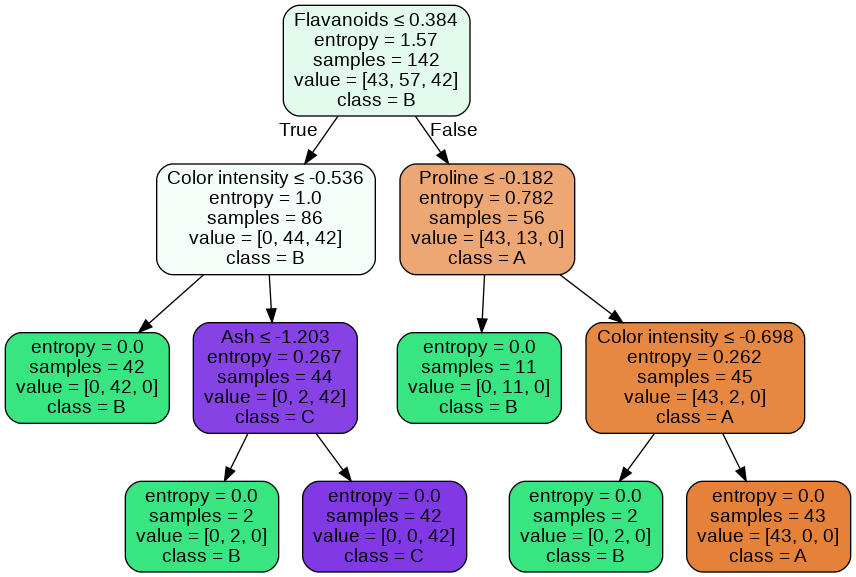

In [ ]:
decisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_tree = decisionTree.fit(X_train, Y_train)

#PODEMOS MOSTRAR A FEATURE MAIS IMPORTANTE (WHITE BOX?)
print(model_tree.feature_importances_)
print('\n')

name_classes = model_tree.classes_

# MONTAR A IMAGEM DA ÁRVORE
dot_data = StringIO()
export_graphviz(model_tree, out_file=dot_data, filled=True, feature_names=name_features, class_names=name_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("model_tree.png")
Image('model_tree.png')

# Features/Atributos mais importantes

Features de maior importância para o modelo treinado

Feature ranking:
1. feature 6 (0.418147)
2. feature 9 (0.385827)
3. feature 12 (0.143387)
4. feature 2 (0.052639)
5. feature 11 (0.000000)
6. feature 10 (0.000000)
7. feature 8 (0.000000)
8. feature 7 (0.000000)
9. feature 5 (0.000000)
10. feature 4 (0.000000)
11. feature 3 (0.000000)
12. feature 1 (0.000000)
13. feature 0 (0.000000)




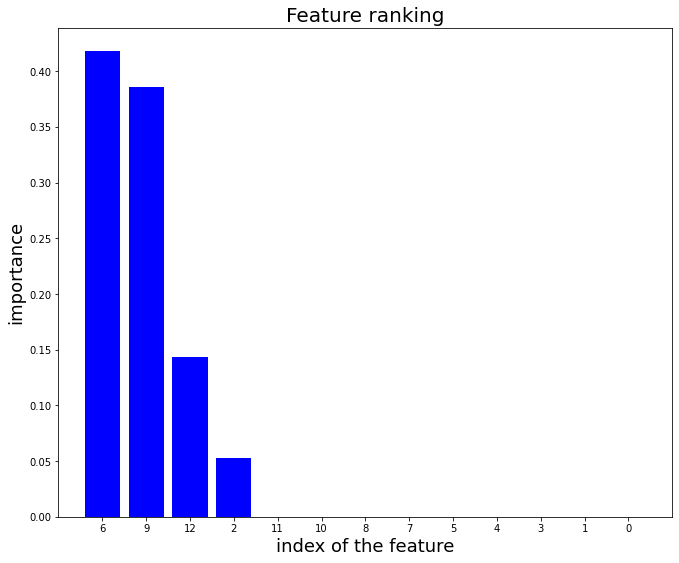

In [ ]:
# # Y SERÁ A MATRIZ COM AS CLASSES
# # ARMAZENANDO AS ETIQUETAS EM Y
Y = df[name_label].values
# # X SERÁ A MATRIZ COM AS FEATURES/ATRIBUTOS
# # ARMAZENANDO OS VALORES EM X
X = df[name_features].values

importances = model_tree.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
print('\n')

f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

# Testando Modelo

* Predições;
* Matriz de Confusão.

ACURÁCIA TREE:  100.00%


              precision    recall  f1-score   support

           A       1.00      1.00      1.00        14
           B       1.00      1.00      1.00        13
           C       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



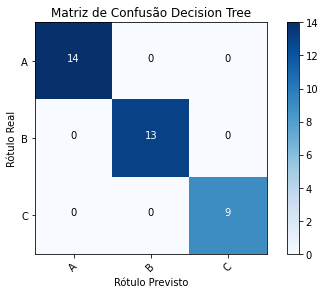

In [ ]:
Y_pred_tree = model_tree.predict(X_test)

print("ACURÁCIA TREE: ", "{1:.2f}%".format("", 100 * accuracy_score(Y_test, Y_pred_tree)))
print('\n')
print(classification_report(Y_test, Y_pred_tree))

# PRECISÃO: DAS CLASSIFICAÇÕES QUE O MODELO FEZ PARA UMA DETERMINADA CLASSE
# RECALL: DOS POSSÍVEIS DATAPOINTS PERTECENTES A UMA DETERMINADA CLASSE

matrix_confusao = confusion_matrix(Y_test, Y_pred_tree)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=name_classes,title='Decision Tree')